In [466]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler

# 컬럼 정보

57920개의 데이터

- ID : 샘플 별 고유 id
- 생산년도 : 차량이 생산된 연도
- 모델출시년도 : 차량의 모델이 처음으로 출시된 연도
- 브랜드
- 차량모델명
- 판매도시 : 3글자로 인코딩된 도시 이름 (도시들로 추정)
- 판매구역 : 3글자로 인코딩된 구역 이름 (공항코드)
- 주행거리 : 총 주행 거리(km)
- 배기량 : 내연기관에서 피스톤이 최대로 밀어내거나 빨아들이는 부피 (cc)
- 압축천연가스(CNG) : 압축천연가스(CNG) 자동차 여부
- 경유 : 경유 자동차 여부
- 가솔린 : 가솔린 자동차 여부
- 하이브리드 : 하이브리드 자동차 여부
- 액화석유가스(LPG) : 액화석유가스(LPG) 자동차 여부
- 가격 : 자동차 가격(백만원)

In [467]:
df = pd.read_csv('../csv/train.csv')
pd.set_option('display.float_format', '{:.2f}'.format)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57920 entries, 0 to 57919
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           57920 non-null  object 
 1   생산년도         57920 non-null  int64  
 2   모델출시년도       57920 non-null  int64  
 3   브랜드          57920 non-null  object 
 4   차량모델명        57920 non-null  object 
 5   판매도시         57920 non-null  object 
 6   판매구역         57920 non-null  object 
 7   주행거리         57920 non-null  int64  
 8   배기량          57920 non-null  int64  
 9   압축천연가스(CNG)  57920 non-null  int64  
 10  경유           57920 non-null  int64  
 11  가솔린          57920 non-null  int64  
 12  하이브리드        57920 non-null  int64  
 13  액화석유가스(LPG)  57920 non-null  int64  
 14  가격           57920 non-null  float64
dtypes: float64(1), int64(9), object(5)
memory usage: 6.6+ MB


In [468]:
numeric_cols = df.select_dtypes(include='number')
numeric_cols.describe()

,생산년도,모델출시년도,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격
count,57920.00,57920.00,57920.00,57920.00,57920.00,57920.00,57920.00,57920.00,57920.00,57920.00
mean,2011.36,2008.03,167869.09,1788.16,0.00,0.43,0.52,0.01,0.05,52.21
std,5.17,5.09,83191.20,545.41,0.02,0.49,0.50,0.10,0.21,35.40
min,1978.00,1983.00,1.00,875.00,0.00,0.00,0.00,0.00,0.00,1.17
25%,2008.00,2004.00,111434.50,1461.00,0.00,0.00,0.00,0.00,0.00,24.57
50%,2011.00,2008.00,171000.00,1753.00,0.00,0.00,1.00,0.00,0.00,42.25
75%,2016.00,2012.00,220000.00,1995.00,0.00,1.00,1.00,0.00,0.00,73.97
max,2022.00,2021.00,2500000.00,6300.00,1.00,1.00,1.00,1.00,1.00,156.00


In [469]:
# 함수 정의

# 차트 한글폰트
plt.rc('font', family='Malgun Gothic')

# 히스토그램 차트
def hist(df, category):
    plt.hist(df[category])
    plt.xlabel(category)
    plt.ylabel('빈도')
    plt.title(f'{category} 분포')
    plt.show()
    
# 박스플롯 차트
def box(df, category):
    sns.boxplot(data=df[category])
    # 그래프 설정
    plt.xlabel(category)
    plt.title(f'{category} 범위에 대한 분포')
    plt.show()
    

# hist subplot
def make_subplot_layout(df,col_num=4) :
    k = len(df.columns)
    row_num = math.ceil(k/col_num)
    plt.figure(figsize=(col_num*4,row_num*3))
    for i in range(k) : 
        plt.subplot(row_num,col_num,i+1)
        plt.hist(df.iloc[:,i])
        plt.title(df.columns[i])
    plt.tight_layout()
    plt.show()

def barplot(category, xsize=10, ysize=10):
    category_counts = df[category].value_counts()
    # 개수 기준으로 정렬
    sorted_data = category_counts.sort_values(ascending=False)
    plt.figure(figsize=(xsize,ysize))
    sns.barplot(y=sorted_data.index, x=sorted_data.values)
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    plt.show()
    
def regplot(df, x, y='가격'):
    correlation = df[x].corr(df[y])
    sns.regplot(x=x, y=y, data=df)
    plt.title(f'상관계수: {correlation}')
    plt.show()

c:\devtools\Miniconda3\envs\meta\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


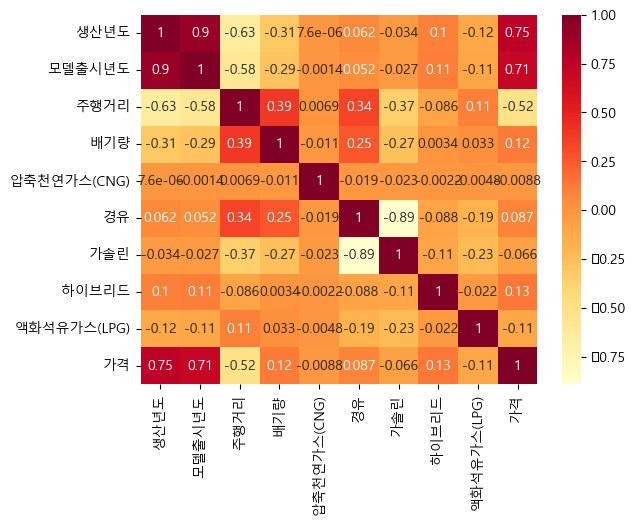

In [470]:
sns.heatmap(numeric_cols.corr(), annot=True, cmap='YlOrRd')

> 가격과 높은 상관계수를 보이는 것은 생산년도, 모델출시년도, 주행거리

## 1. 숫자형 데이터 분석

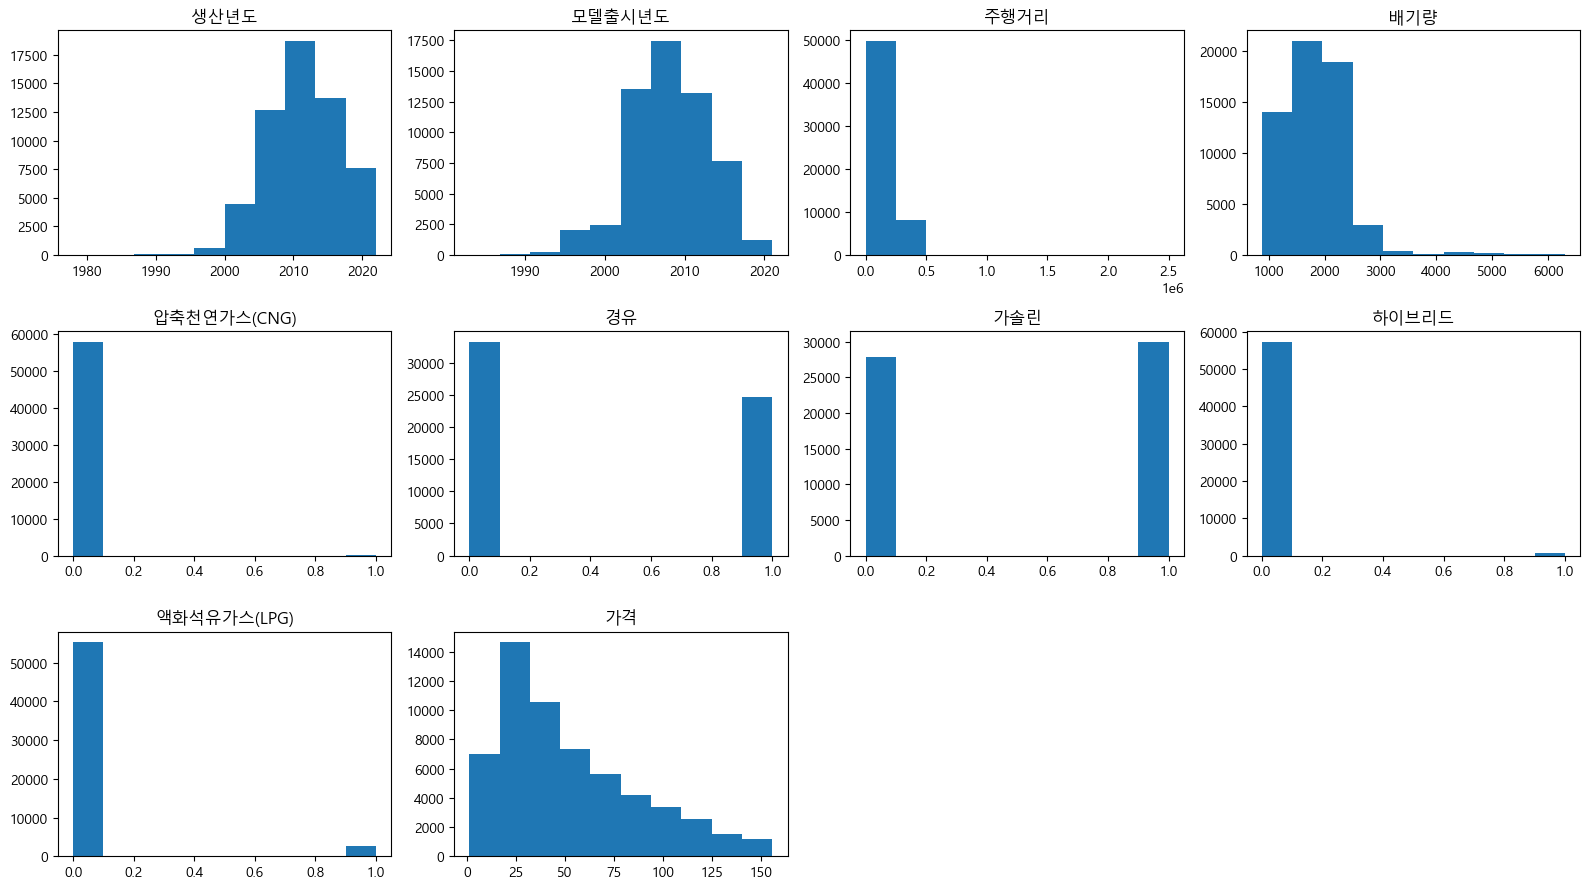

In [471]:
make_subplot_layout(numeric_cols)

### 1.1. 주행거리 분석

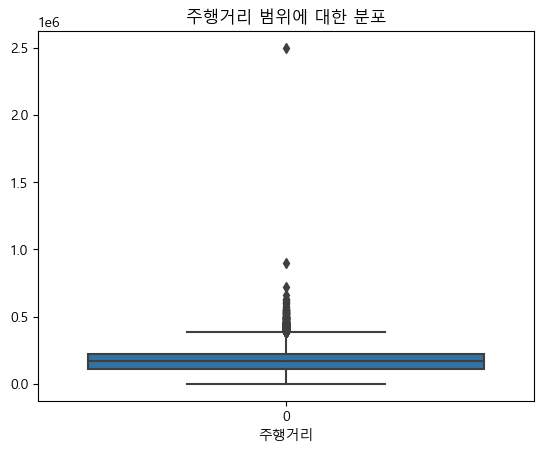

In [472]:
box(df, '주행거리')

In [473]:
sorted_data = df.sort_values(by='주행거리', ascending=False)
sorted_data.head(10)

,ID,생산년도,모델출시년도,브랜드,차량모델명,판매도시,판매구역,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격
40808,TRAIN_40808,2014,2014,ford,mondeo,POZ,LUB,2500000,1999,0,0,0,1,0,30.94
57668,TRAIN_57668,2017,2014,mercedes-benz,vito,PIL,WIE,900000,2143,0,1,0,0,0,87.94
21390,TRAIN_21390,2007,2006,mercedes-benz,gl-klasa,KAR,LUU,720000,2987,0,1,0,0,0,55.90
27691,TRAIN_27691,2013,2006,mercedes-benz,sprinter,ILA,WAR,657130,2143,0,1,0,0,0,49.57
16290,TRAIN_16290,2008,2002,opel,vectra,PAN,SLA,631970,1910,0,1,0,0,0,15.59
34462,TRAIN_34462,2015,2003,mercedes-benz,vito,ZSR,LUB,631000,2143,0,1,0,0,0,64.87
55266,TRAIN_55266,2008,2007,volkswagen,tiguan,KAL,WIE,620000,1968,0,1,0,0,0,36.40
57217,TRAIN_57217,2008,2002,mercedes-benz,e-klasa,PAW,SWI,617000,2148,0,1,0,0,0,37.05
26507,TRAIN_26507,2011,2008,skoda,superb,WAR,MAZ,611500,1984,0,0,1,0,0,33.80
5812,TRAIN_05812,2010,2001,renault,trafic,SOS,SLA,602112,1998,0,0,1,0,0,29.77


In [474]:
# 주행거리가 2500000인 것은 이상치라고 판단하여 제거함
df = df[df['주행거리'] != df['주행거리'].max()]

In [475]:
df['주행거리'].describe()

count    57919.00
mean    167828.82
std      82625.58
min          1.00
25%     111433.00
50%     171000.00
75%     220000.00
max     900000.00
Name: 주행거리, dtype: float64

In [476]:
df['주행거리'].quantile(0.02), df['주행거리'].quantile(0.025)

(10.0, 6500.0)

> 상위 2%와 상위 2.5%간의 차이가 크게 존재하는 것을 확인

In [477]:
top_2pct = df['주행거리'].quantile(0.02)
low_km = df[df['주행거리'] <= top_2pct]
low_km.sort_values(by='생산년도')

,ID,생산년도,모델출시년도,브랜드,차량모델명,판매도시,판매구역,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격
49557,TRAIN_49557,1991,1983,volkswagen,golf,ZGI,LOD,1,1588,0,1,0,0,0,12.87
51779,TRAIN_51779,2019,2012,volkswagen,golf,PLO,MAZ,10,1598,0,1,0,0,0,116.87
35867,TRAIN_35867,2020,2016,fiat,tipo,LOD,LOD,1,999,0,0,1,0,0,99.45
57861,TRAIN_57861,2020,2016,fiat,tipo,JBM,POD,1,1400,0,0,1,0,0,83.19
25314,TRAIN_25314,2020,2018,ford,focus,ELK,WAR,5,999,0,0,1,0,0,114.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47088,TRAIN_47088,2022,2017,volvo,xc-60,GDA,POM,5,1969,0,1,0,0,0,79.95
33326,TRAIN_33326,2022,2017,hyundai,i30,DAB,SLA,7,1498,0,0,1,0,0,104.00
33089,TRAIN_33089,2022,2021,skoda,fabia,KAT,SLA,1,999,0,0,1,0,0,114.59
33913,TRAIN_33913,2022,2015,volkswagen,caddy,LOD,LOD,5,2000,0,1,0,0,0,131.40


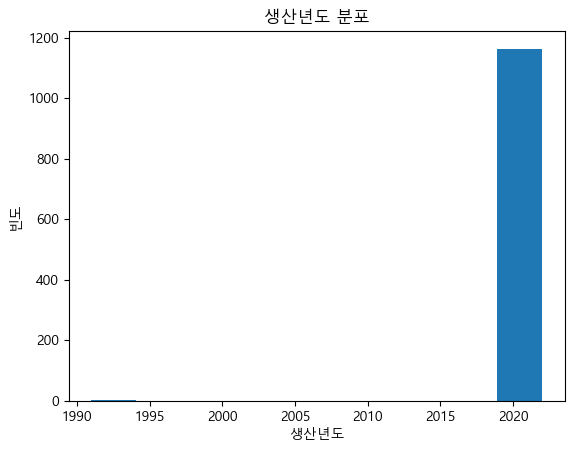

In [478]:
hist(low_km, '생산년도')

> 주행거리가 10km 미만인 데이터 중에서 1991년 생산년도와 2019년도의 데이터를 제외하면, 2020년 이후에 생산된 차량인 것을 확인.
>> 도메인 분석상 주행거리 200km 미만은 신차라고 구분. 중고차 가격 예측이므로 해당 데이터들을 제외

In [479]:
df = df[df["주행거리"] >= 200]

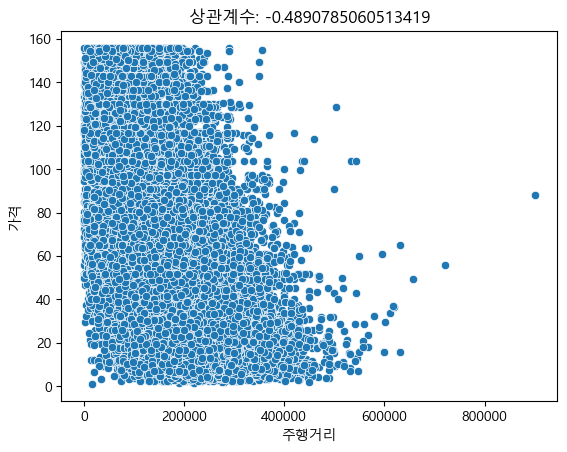

In [480]:
correlation = df['주행거리'].corr(df['가격'])
sns.scatterplot(data= df, x='주행거리', y='가격')
plt.title(f'상관계수: {correlation}')
plt.show()

> 주행거리에 따라 가격이 낮아지는 음의 상관계수를 확인.

> 대부분의 중고차는 연식에 따라 주행거리가 늘어난다. 전체 데이터의 주행거리는 설명력이 부족하다고 판단.
>>그렇다면 같은 출시년도의 같은 차량이어도 주행거리에 따라 가격이 낮아질까?

In [481]:
grouped_data = df.groupby(['생산년도', '차량모델명'])
model_counts = grouped_data.size().reset_index(name='개수')
most_common_model = model_counts.groupby('생산년도')['개수'].idxmax() # 생산년도별로 가장 많은 차량모델명을 가진 인덱스를 반환
most_common_data = model_counts.loc[most_common_model] # 생산년도별 차량모델명의 개수가 가장 많은 데이터만 저장하게 됌
# 연식이 조금 있는 차량으로 비교
display(most_common_data[most_common_data['생산년도'] <= 2012].max())

생산년도        2012
차량모델명    seria-5
개수           274
dtype: object

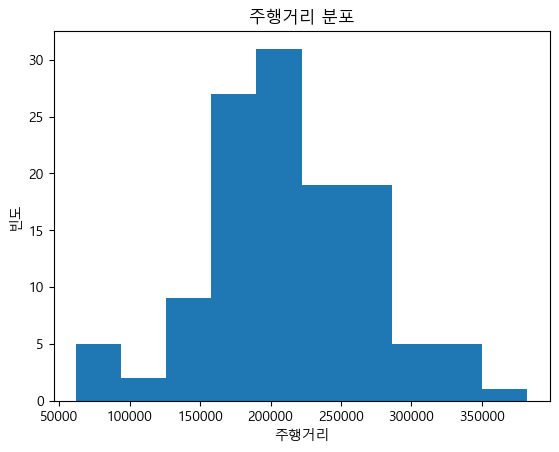

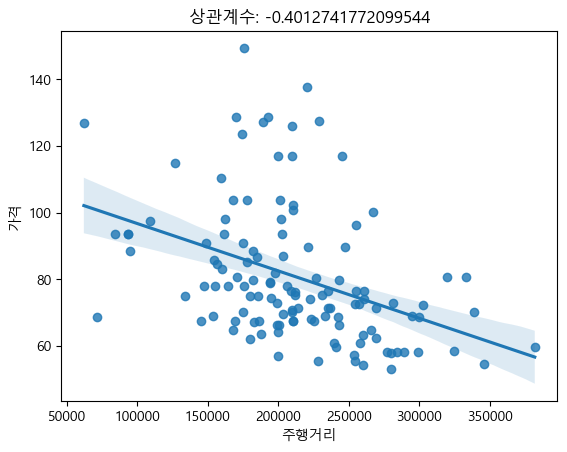

In [482]:
seria2012 = df[(df['생산년도']==2012) & (df['차량모델명']=='seria-5')]
hist(seria2012, '주행거리')
regplot(seria2012, '주행거리')

> 상관계수가 비슷한 수치로 확인.
>> 그런데 평균치에서 가장 큰 가격의 차이를 보이고 있다.

In [483]:
seria2012.head(10)

,ID,생산년도,모델출시년도,브랜드,차량모델명,판매도시,판매구역,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격
972,TRAIN_00972,2012,2009,bmw,seria-5,KRA,MAL,229000,2993,0,1,0,0,0,127.40
1118,TRAIN_01118,2012,2009,bmw,seria-5,KXH,POM,175420,2993,0,1,0,0,0,149.50
1548,TRAIN_01548,2012,2009,bmw,seria-5,GAB,MAZ,228000,1995,0,1,0,0,0,55.64
1575,TRAIN_01575,2012,2009,bmw,seria-5,TYR,LUU,202000,2979,0,0,0,1,0,98.15
3460,TRAIN_03460,2012,2009,bmw,seria-5,SMU,DOL,210100,1995,0,1,0,0,0,67.47
4919,TRAIN_04919,2012,2009,bmw,seria-5,IFA,KUJ,266000,1995,0,1,0,0,0,64.87
5285,TRAIN_05285,2012,2009,bmw,seria-5,ZAB,SLA,289000,1995,0,1,0,0,0,58.24
5551,TRAIN_05551,2012,2009,bmw,seria-5,CZE,SLA,210000,2979,0,0,1,0,0,116.87
6188,TRAIN_06188,2012,2009,bmw,seria-5,BED,SLA,200000,1995,0,1,0,0,0,57.07
6749,TRAIN_06749,2012,2009,bmw,seria-5,WRZ,WIE,178000,2993,0,1,0,0,0,85.15


### 1.2. 배기량 분석

2012년 seria-5의 배기량


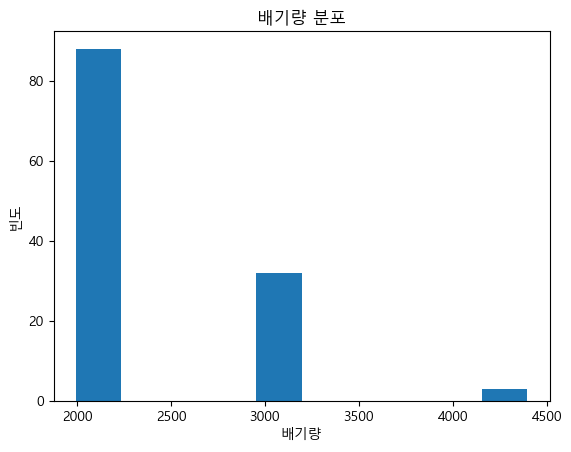

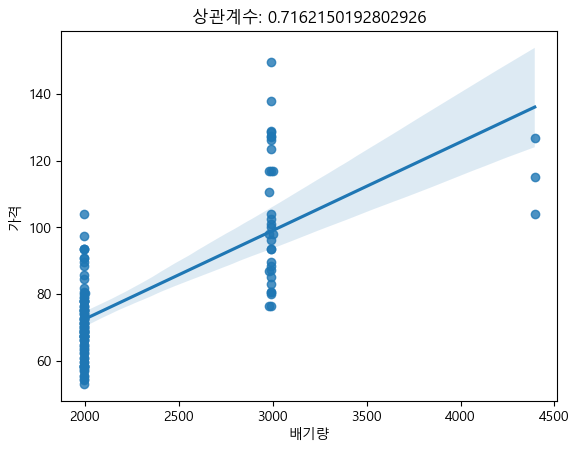

In [484]:
# 배기량에 따른 상관계수도 확인해보자.
print('2012년 seria-5의 배기량')
hist(seria2012, '배기량')
regplot(seria2012, '배기량')

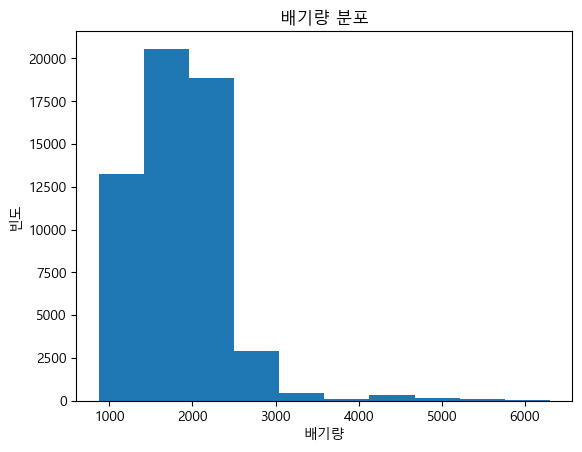

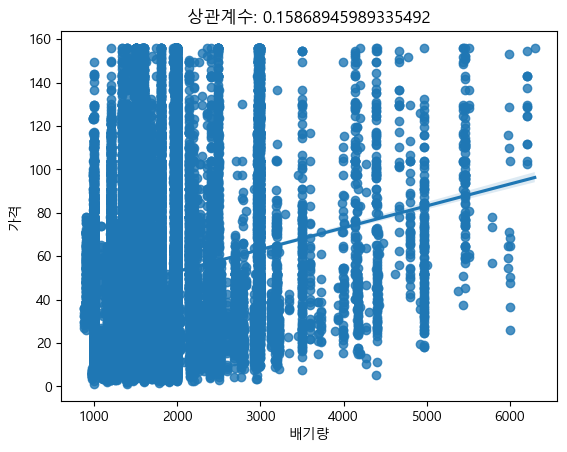

In [485]:
# 전체 데이터에서의 배기량
hist(df, '배기량')
regplot(df, '배기량')

> 특정 차량모델에서의 배기량은 높은 양의 상관계수를 확인.
>> 하지만 전체데이터에서는 매우 약한 상관관계를 나타냄.<br>
3000cc 이상의 데이터가 극소량인게 이유일까?

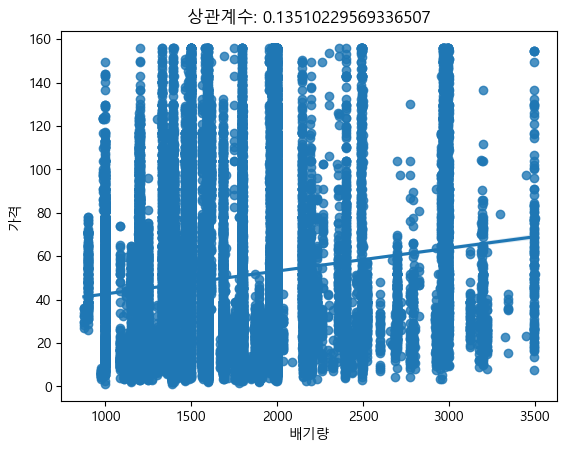

In [486]:
# 3500cc 이하의 데이터들의 상관관계
low_3500cc = df[df['배기량'] <= 3500]
regplot(low_3500cc, '배기량')

> <!-- TODO --> 어떻게 해석해야할지 모르겠음

### 1.3. 생산년도와 모델출시년도

In [487]:
df['생산년도'].corr(df['모델출시년도'])

0.8950956290441067

> 독립변수인 생산년도와 모델출시년도는 굉장히 높은 상관관계를 띔.

In [488]:
df['나이'] = df['생산년도'] - df['모델출시년도']
df['나이'].describe()

count   56698.00
mean        3.29
std         2.29
min       -26.00
25%         1.00
50%         3.00
75%         5.00
max        20.00
Name: 나이, dtype: float64

> 백분위 50의 값을 기준으로 생산년도와 모델출시년도의 가격과 상관관계를 각각 비교해 봄.

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


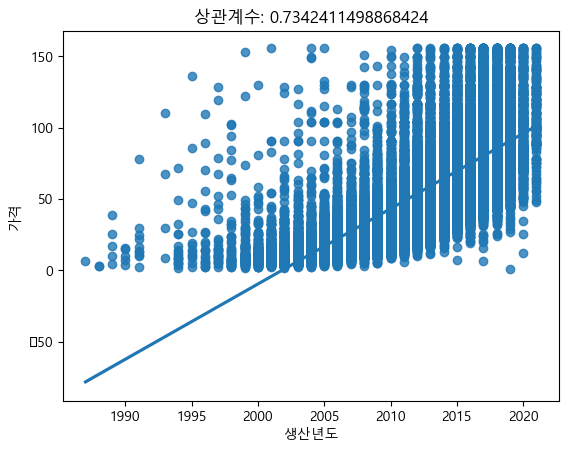

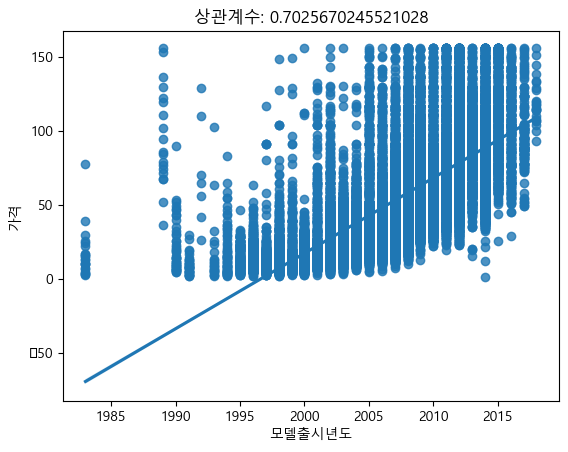

In [489]:
over_3_age = df[df['나이'] >= 3]

regplot(over_3_age, '생산년도')
regplot(over_3_age, '모델출시년도')

> 생산년도와 모델출시년도의 차이가 3년이상이어도 상관계수는 비슷하며 데이터의 분포도 비슷한 경향을 띔.
>> 가격과 조금 더 상관관계가 높은 생산년도만 사용하는게 나아보임.

In [490]:
df.drop('모델출시년도', axis=1, inplace=True)

In [491]:
df.drop('나이', axis=1, inplace=True)

In [492]:
df['연평균주행거리'] = df['주행거리'] / (2022 - df['생산년도'])

df['연평균주행거리'].describe()

count    56698.00
mean     17156.56
std       8212.68
min         67.33
25%      11813.87
50%      15500.00
75%      20732.58
max     180000.00
Name: 연평균주행거리, dtype: float64

In [493]:
df.sort_values(by='연평균주행거리', ascending=True)

,ID,생산년도,브랜드,차량모델명,판매도시,판매구역,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격,연평균주행거리
12164,TRAIN_12164,2019,opel,astra,BEL,LOD,202,1199,0,0,1,0,0,99.97,67.33
18382,TRAIN_18382,2016,mazda,3,GRU,KUJ,415,1998,0,0,1,0,0,72.67,69.17
48420,TRAIN_48420,2019,opel,astra,KRA,MAL,266,1199,0,0,1,0,0,78.00,88.67
22266,TRAIN_22266,2019,opel,astra,LOD,LOD,300,1199,0,0,1,0,0,103.87,100.00
49755,TRAIN_49755,2020,opel,astra,WAR,MAZ,250,1199,0,0,1,0,0,116.87,125.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30368,TRAIN_30368,2021,skoda,fabia,RYB,SLA,99456,999,0,0,0,0,1,62.27,99456.00
32672,TRAIN_32672,2018,bmw,seria-5,POZ,WIE,400000,1998,0,0,1,0,0,99.97,100000.00
28668,TRAIN_28668,2018,mercedes-benz,sprinter,NRQ,LOD,420000,2143,0,1,0,0,0,116.87,105000.00
44453,TRAIN_44453,2021,volkswagen,passat,BUL,SLA,130000,1968,0,1,0,0,0,100.10,130000.00


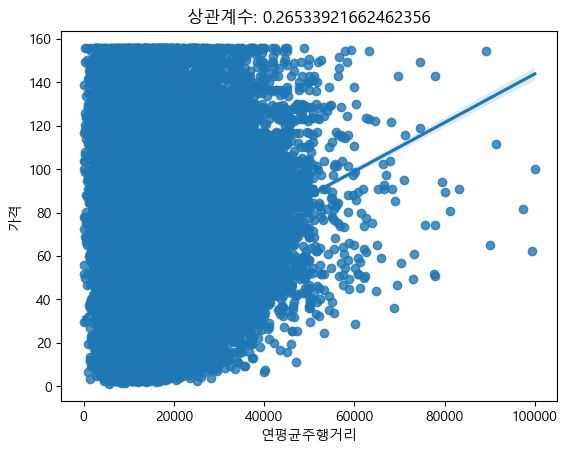

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


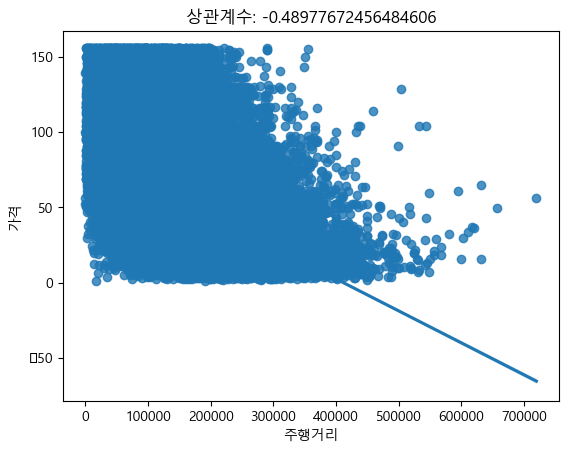

In [494]:
df = df[df['연평균주행거리'] <= 100000]

regplot(df, '연평균주행거리')
regplot(df, '주행거리')

> 연평균주행거리를 계산하여 이상치로 추정한 값들을 제외했을 때 주행거리의 상관계수가 0.8만큼 증가
>> 구매자들은 상대적인 주행거리보다 절대적인 주행거리 수치에 주목하는 것을 확인.

## 2. 범주형 데이터 분석

### 2.1. 브랜드

In [495]:
df.head(10)

,ID,생산년도,브랜드,차량모델명,판매도시,판매구역,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격,연평균주행거리
0,TRAIN_00000,2018,skoda,fabia,KAT,SLA,85231,999,0,0,1,0,0,51.74,21307.75
1,TRAIN_00001,2010,toyota,auris,RKO,SWI,135000,1598,0,0,1,0,0,41.47,11250.00
2,TRAIN_00002,2002,mercedes-benz,clk-klasa,GNI,WIE,255223,1796,0,0,1,0,0,17.81,12761.15
3,TRAIN_00003,2006,nissan,x-trail,EHX,WIE,238000,2184,0,1,0,0,0,18.20,14875.00
4,TRAIN_00004,2007,fiat,bravo,OSW,MAL,251000,1910,0,1,0,0,0,17.55,16733.33
5,TRAIN_00005,2001,audi,a4,KAT,SLA,340000,1984,0,0,0,0,1,7.80,16190.48
7,TRAIN_00007,2005,volkswagen,passat,ELB,WAR,217850,1595,0,0,1,0,0,20.80,12814.71
8,TRAIN_00008,2018,skoda,fabia,OPO,OPO,98514,1000,0,0,1,0,0,62.27,24628.50
9,TRAIN_00009,2011,citroen,c4-picasso,LUB,LUB,201000,1560,0,1,0,0,0,28.47,18272.73
10,TRAIN_00010,2011,bmw,seria-5,ZGO,DOL,224000,1995,0,1,0,0,0,78.00,20363.64


In [496]:
df['브랜드'].unique()

array(['skoda', 'toyota', 'mercedes-benz', 'nissan', 'fiat', 'audi',
       'volkswagen', 'citroen', 'bmw', 'opel', 'ford', 'mazda', 'honda',
       'kia', 'seat', 'renault', 'volvo', 'peugeot', 'hyundai',
       'mitsubishi'], dtype=object)

> 결측치라고 볼 수 있는 데이터는 없음.

In [497]:
df['브랜드'].value_counts()

opel             6561
ford             5771
volkswagen       5612
audi             5590
bmw              5260
renault          3684
toyota           3192
skoda            3047
mercedes-benz    2893
nissan           2084
kia              1903
hyundai          1667
seat             1615
mazda            1563
honda            1514
volvo            1351
citroen          1127
fiat              970
peugeot           789
mitsubishi        502
Name: 브랜드, dtype: int64

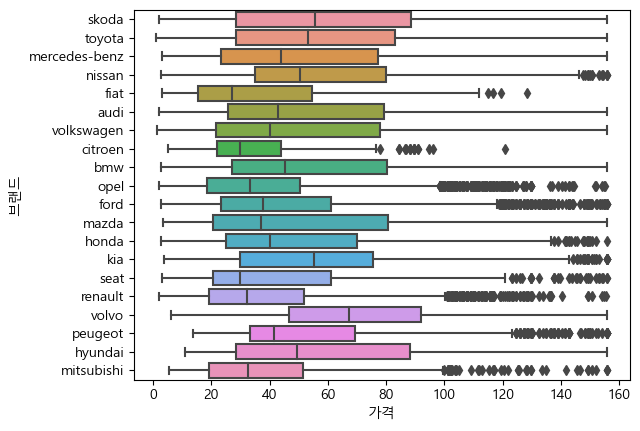

In [498]:
sns.boxplot(x='가격', y='브랜드', data=df)
plt.show()

> 이상치가 대략 120이상 구간에 모여있는 것을 확인.
>> 저가모델과 고가모델의 차이인지 알아보기

In [499]:
# ford브랜드를 통해 가격이 60이하인 것과 120이상인 것의 차량모델정보를 확인
under_price = df[(df['브랜드'] == 'ford') & (df['가격'] < 60)]
over_price = df[(df['브랜드'] == 'ford') & (df['가격'] >= 120)]

display(under_price.head(10),over_price.head(10))

,ID,생산년도,브랜드,차량모델명,판매도시,판매구역,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격,연평균주행거리
12,TRAIN_00012,2009,ford,galaxy,PLO,MAZ,236424,1997,0,1,0,0,0,33.67,18186.46
25,TRAIN_00025,2005,ford,c-max,JWZ,SWI,140000,1798,0,0,1,0,0,16.38,8235.29
32,TRAIN_00032,2005,ford,focus,MAR,WIE,187000,1596,0,0,1,0,0,19.11,11000.00
50,TRAIN_00050,2015,ford,focus,ZSR,LUB,143000,1498,0,1,0,0,0,57.85,20428.57
53,TRAIN_00053,2010,ford,focus,LOD,LOD,110858,1596,0,0,1,0,0,28.47,9238.17
57,TRAIN_00057,2011,ford,mondeo,SYB,SLA,213000,1997,0,1,0,0,0,25.87,19363.64
62,TRAIN_00062,2007,ford,focus,GRU,KUJ,219500,1596,0,0,0,0,1,16.77,14633.33
64,TRAIN_00064,2009,ford,focus,UEI,DOL,123000,1596,0,0,1,0,0,23.27,9461.54
107,TRAIN_00107,2014,ford,focus,PIA,MAZ,105186,999,0,0,1,0,0,44.20,13148.25
130,TRAIN_00130,2004,ford,c-max,SWA,WIE,148000,1596,0,0,1,0,0,12.87,8222.22


,ID,생산년도,브랜드,차량모델명,판매도시,판매구역,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격,연평균주행거리
121,TRAIN_00121,2018,ford,mondeo,GMH,MAL,43294,1999,0,0,0,1,0,150.67,10823.50
1102,TRAIN_01102,2018,ford,mondeo,GDY,POM,41518,1999,0,0,1,0,0,124.67,10379.50
1206,TRAIN_01206,2017,ford,kuga,PLO,MAZ,58344,1997,0,1,0,0,0,123.37,11668.80
1212,TRAIN_01212,2019,ford,kuga,WAR,MAZ,25142,1498,0,0,1,0,0,136.37,8380.67
1848,TRAIN_01848,2018,ford,mondeo,GDY,POM,104598,1997,0,1,0,0,0,120.77,26149.50
1967,TRAIN_01967,2017,ford,mondeo,POO,DOL,49706,1997,0,1,0,0,0,148.07,9941.20
2001,TRAIN_02001,2019,ford,mondeo,ELB,WAR,52800,1498,0,0,1,0,0,123.11,17600.00
2101,TRAIN_02101,2017,ford,s-max,WAR,MAZ,136100,1997,0,1,0,0,0,132.34,27220.00
2462,TRAIN_02462,2019,ford,mondeo,KRA,MAL,12777,1999,0,0,0,1,0,129.87,4259.00
2637,TRAIN_02637,2021,ford,focus,BYT,SLA,13500,999,0,0,1,0,0,144.17,13500.00


가격이 60 미만인 ford 차종 : ['galaxy' 'c-max' 'focus' 'mondeo' 'fiesta' 's-max' 'kuga' 'ka' 'transit'
 'transit-connect']


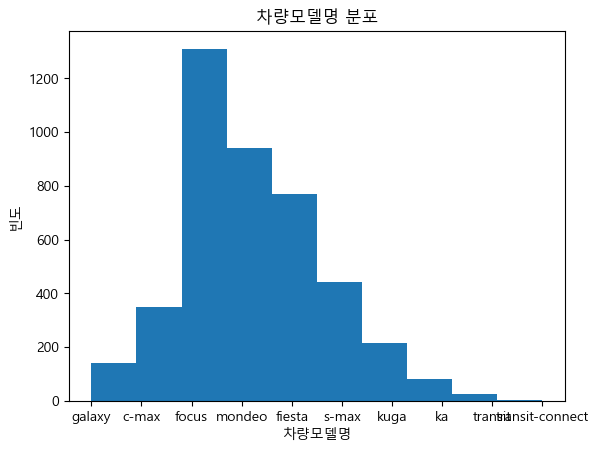

가격이 120 이상인 ford 차종 : ['mondeo' 'kuga' 's-max' 'focus' 'transit' 'galaxy' 'fiesta']


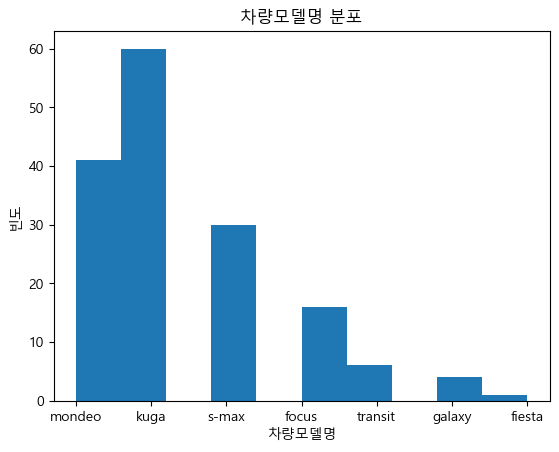

In [500]:
print(f'가격이 60 미만인 ford 차종 : {under_price["차량모델명"].unique()}')
hist(under_price, '차량모델명')
print(f'가격이 120 이상인 ford 차종 : {over_price["차량모델명"].unique()}')
hist(over_price, '차량모델명')

In [501]:
set1 = set(under_price["차량모델명"].unique())
set2 = set(over_price["차량모델명"].unique())

intersection = set1.intersection(set2)

result = list(intersection)

print(f'교집합 : {result}')

교집합 : ['s-max', 'mondeo', 'fiesta', 'galaxy', 'kuga', 'focus', 'transit']


> ford사의 focus는 60이하의 가격에서 가장 많은 분포를 보이지만 120이상의 가격에서도 소수의 데이터가 존재.
>> 저가형 모델로 추정되는 focus를 통해 고가의 focus와 비교

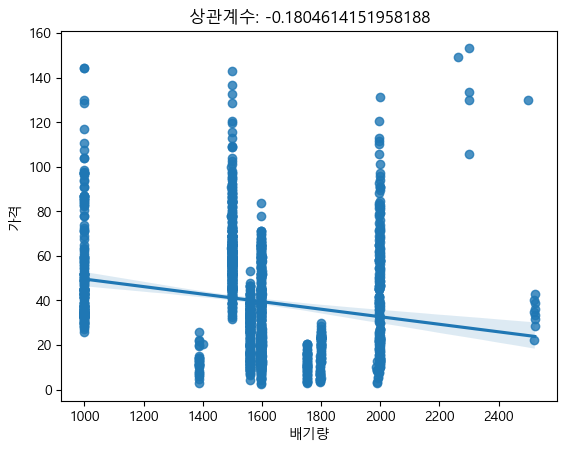

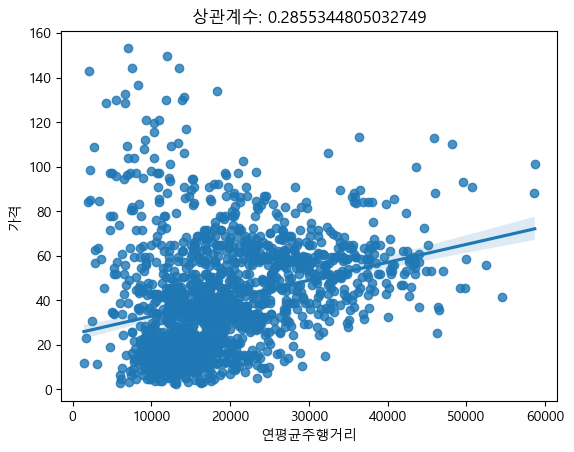

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


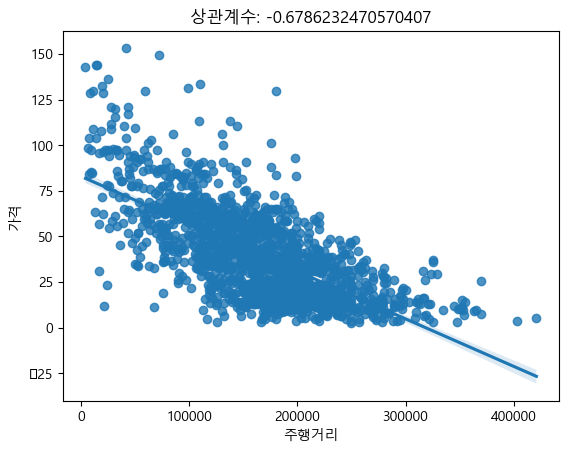

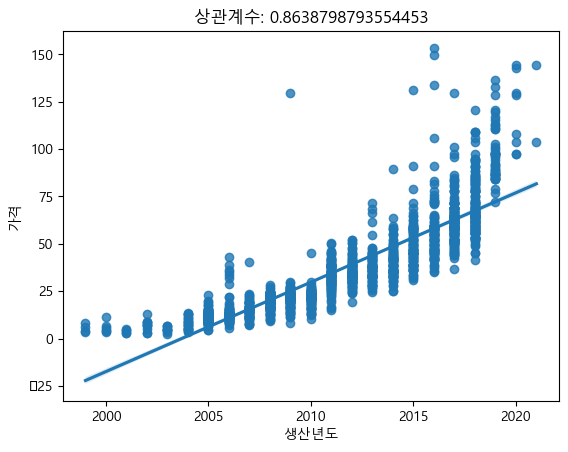

In [502]:
focus = df[(df['차량모델명'] == 'focus')]

regplot(focus, '배기량')
regplot(focus, '연평균주행거리')
regplot(focus, '주행거리')
regplot(focus, '생산년도')

> 생산년도와 주행거리가 가장 높은 상관계수를 보이는 것으로 확인.
>> 배기량이 높을수록 오히려 **음의 상관계수**를 보이는 것을 확인.<br>
연식과 주행거리는 모든 데이터에서 높은 상관계수를 보이고 있으므로,<br>
데이터의 분포로 볼 때 저가형모델과 고가형 모델이 존재하는 것으로 추정

> 저가형과 고가형모델을 나누어 준다면? ~~TODO로 남겨두자~~

### 2.2. 지역

In [503]:
len(df['판매도시'].unique()), len(df['판매구역'].unique())

(3224, 17)

In [504]:
df['판매구역'].value_counts()

MAZ    10680
SLA     7379
WIE     6805
MAL     4654
DOL     4521
LOD     3448
POM     3436
LUB     2577
KUJ     2511
ZAC     2035
POD     1822
SWI     1776
WAR     1546
LUU     1402
POL     1058
OPO     1028
MOR       17
Name: 판매구역, dtype: int64

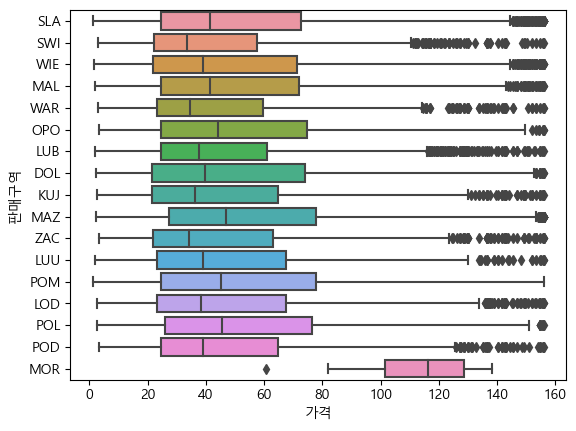

In [505]:
sns.boxplot(x='가격', y='판매구역', data=df)
plt.show()

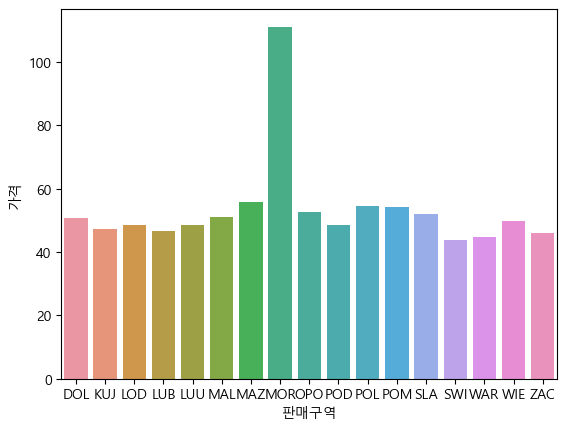

In [506]:
mean_prices = df.groupby('판매구역')['가격'].mean().reset_index()

sns.barplot(x='판매구역', y='가격', data=mean_prices)
plt.show()

> 모로코 지역의 마라캐시공항을 제외하곤 모두 비슷한 평균 가격 값을 보임.

In [507]:
df[df['판매구역'] == 'MOR'].shape[0]

17

> MOR의 개수가 매우 적어 MOR을 제외했을 때 평균가격은 40~60 사이로 해당 컬럼의 의미가 크다고 볼 수 없음.

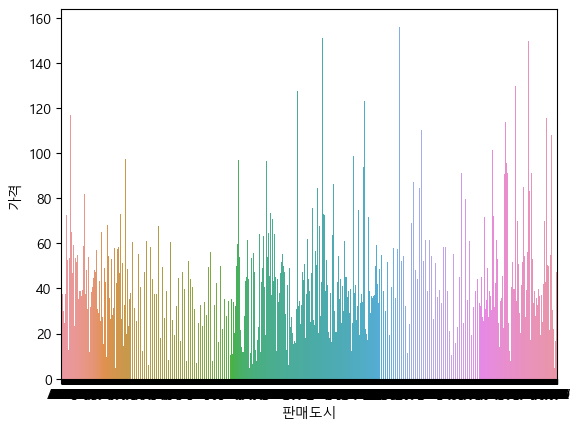

In [508]:
# 마라캐시 공항을 제거하고 도시별 평균 가격 차트 보기
not_MOR = df[df['판매구역'] != 'MOR']
mean_prices = not_MOR.groupby('판매도시')['가격'].mean().reset_index()

sns.barplot(x='판매도시', y='가격', data=mean_prices)
plt.show()


In [509]:
df['판매도시'].value_counts()

WAR    3127
KRA    1197
WRO    1116
LOD    1038
POZ     956
       ... 
MVH       1
CIB       1
CED       1
FNQ       1
ZDZ       1
Name: 판매도시, Length: 3224, dtype: int64


    WAR 지역의 astra 평균 가격: 52.91286821705427
    다른 지역들의 astra 평균 가격 : 39.96325932132383
    


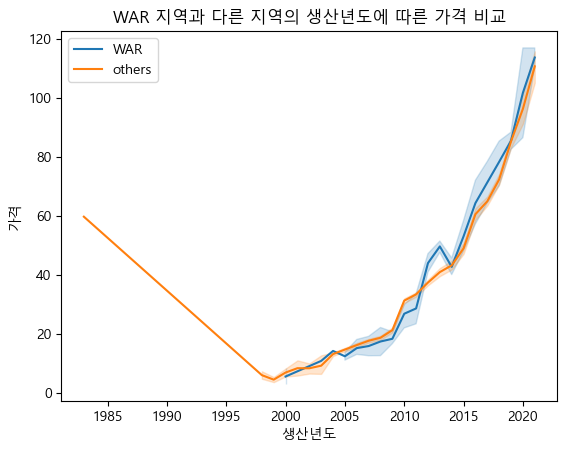

In [510]:
# WAR 값으로 비교

astra_WAR = df[(df['판매도시'] == 'WAR') & (df['차량모델명'] == 'astra')]
astra_others = df[(df['판매도시'] != 'WAR') & (df['차량모델명'] == 'astra')]

print(f'''
    WAR 지역의 astra 평균 가격: {astra_WAR['가격'].mean()}
    다른 지역들의 astra 평균 가격 : {astra_others['가격'].mean()}
    ''')
sns.lineplot(data=astra_WAR, x='생산년도', y='가격', label='WAR')
sns.lineplot(data=astra_others, x='생산년도', y='가격', label='others')

plt.title('WAR 지역과 다른 지역의 생산년도에 따른 가격 비교')
plt.legend()
plt.show()

> 판매도시 역시 무의미하다고 판단.

## 3. 스케일링

In [511]:
print(f'''
      평균
      ----------------------------
      {df.mean()}  
      분산
      ----------------------------
      {df.var()}
      ''')


      평균
      ----------------------------
      생산년도            2011.15
주행거리          171426.41
배기량             1799.36
압축천연가스(CNG)        0.00
경유                 0.43
가솔린                0.51
하이브리드              0.01
액화석유가스(LPG)        0.05
가격                50.95
연평균주행거리        17150.14
dtype: float64  
      분산
      ----------------------------
      생산년도                  25.23
주행거리          6344264138.09
배기량               296288.70
압축천연가스(CNG)            0.00
경유                     0.25
가솔린                    0.25
하이브리드                  0.01
액화석유가스(LPG)            0.04
가격                  1191.84
연평균주행거리         66623229.69
dtype: float64
      


C:\Users\user\AppData\Local\Temp\ipykernel_1764\3066652024.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  {df.mean()}
C:\Users\user\AppData\Local\Temp\ipykernel_1764\3066652024.py:7: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  {df.var()}


가장 상관계수가 높은 생산년도에 비해 주행거리와 배기량이 높은 분산도를 갖고있다.

In [512]:
df['주행거리'] = np.log(df['주행거리'])
df['연평균주행거리'] = np.log(df['연평균주행거리'])
df['배기량'] = np.log(df['배기량'])

C:\Users\user\AppData\Local\Temp\ipykernel_1764\1508751590.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['주행거리'] = np.log(df['주행거리'])
C:\Users\user\AppData\Local\Temp\ipykernel_1764\1508751590.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['연평균주행거리'] = np.log(df['연평균주행거리'])
C:\Users\user\AppData\Local\Temp\ipykernel_1764\1508751590.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [513]:
print(f'''
      평균
      ----------------------------
      {df.mean()}  
      분산
      ----------------------------
      {df.var()}
      ''')


      평균
      ----------------------------
      생산년도          2011.15
주행거리            11.89
배기량              7.46
압축천연가스(CNG)      0.00
경유               0.43
가솔린              0.51
하이브리드            0.01
액화석유가스(LPG)      0.05
가격              50.95
연평균주행거리          9.64
dtype: float64  
      분산
      ----------------------------
      생산년도            25.23
주행거리             0.45
배기량              0.07
압축천연가스(CNG)      0.00
경유               0.25
가솔린              0.25
하이브리드            0.01
액화석유가스(LPG)      0.04
가격            1191.84
연평균주행거리          0.24
dtype: float64
      


C:\Users\user\AppData\Local\Temp\ipykernel_1764\3066652024.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  {df.mean()}
C:\Users\user\AppData\Local\Temp\ipykernel_1764\3066652024.py:7: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  {df.var()}


> 생산년도의 표준화 스케일링 진행